# Author : Sevda Georgieva

## Prediction using Unsupervised Machine Learning
Predict the optimum number of clusters and represent it visually using the Iris dataset.

## **Packages**

In [37]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import pandas as pd
import seaborn as sns
import numpy as np

## **Import Dataset**

In [16]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [17]:
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y

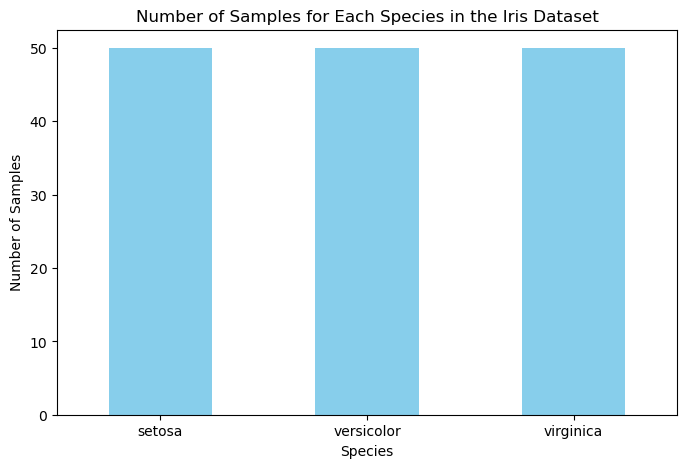

In [19]:
# Display the categories in the target variable
species_names = [iris.target_names[i] for i in species_counts.index]
species_counts.index = species_names

plt.figure(figsize=(8, 5))
species_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Samples for Each Species in the Iris Dataset')
plt.xlabel('Species')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.show()

There are 3 classes in the Iris dataset i.e., we need 3 clusters.

##  **K-Means Clustering** 

In [20]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [27]:
# Map clusters to true labels based on majority voting
def get_cluster_label_mapping(y_true, y_pred, n_clusters):
    mapping = {}
    for cluster in range(n_clusters):
        mask = (y_pred == cluster)
        true_labels = y_true[mask]
        most_common_label = np.bincount(true_labels).argmax()
        mapping[cluster] = most_common_label
    return mapping

cluster_label_mapping = get_cluster_label_mapping(y, df['cluster'], 3)
df['mapped_cluster'] = df['cluster'].map(cluster_label_mapping)

# Confusion Matrix and Accuracy
conf_matrix = confusion_matrix(y, df['mapped_cluster'])
accuracy = accuracy_score(y, df['mapped_cluster'])
print("Confusion Matrix:")
print(conf_matrix)
print(f"\nAccuracy: {accuracy:.2f}")

Confusion Matrix:
[[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]

Accuracy: 0.89


1. Iris-setosa: All 50 samples were perfectly clustered into cluster 0.
2. Iris-versicolor: 48 samples were correctly clustered into cluster 1, but 2 samples were misclassified into cluster 2.
3. Iris-virginica: 36 samples were correctly clustered into cluster 2, while 14 samples were misclassified into cluster 1.

*Conclusion:* The model cannot distinguish well between Iris-versicolor and Iris-virginica.

## **Improve Cluster Accuracy**

To enhance the model's ability to differentiate between clusters, various strategies can be implemented. These include feature engineering, experimenting with different clustering algorithms, or applying advanced techniques like ensemble methods.

However, given the nature of the features in the Iris dataset, feature engineering may not provide significant benefits. Additionally, ensemble methods could be unnecessarily complex for this task. Therefore, a more suitable approach would be to use a different algorithm, such as Gaussian Mixture Models (GMM). GMM offers greater flexibility than K-Means by assuming clusters follow Gaussian distributions.

Furthermore, we can standardize the values to ensure that all features contribute equally to the distance calculations.

In [32]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply GMM
gmm = GaussianMixture(n_components=3, random_state=42)
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y
df['cluster'] = gmm.fit_predict(X_scaled)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [38]:
# Map clusters to true labels based on majority voting
cluster_label_mapping = get_cluster_label_mapping(y, df['cluster'], 3)
df['mapped_cluster'] = df['cluster'].map(cluster_label_mapping)

# Confusion Matrix and Accuracy
conf_matrix = confusion_matrix(y, df['mapped_cluster'])
accuracy = accuracy_score(y, df['mapped_cluster'])
print("Confusion Matrix:")
print(conf_matrix)
print(f"\nAccuracy: {accuracy:.2f}")

Confusion Matrix:
[[50  0  0]
 [ 0 45  5]
 [ 0  0 50]]

Accuracy: 0.97


*Conclusion:* Significant improvement in the distinction between Iris-versicolor and Iris-virginica.
Accuracy increased with 8%.

## **Comparison of Clustering between K-means and GMM**

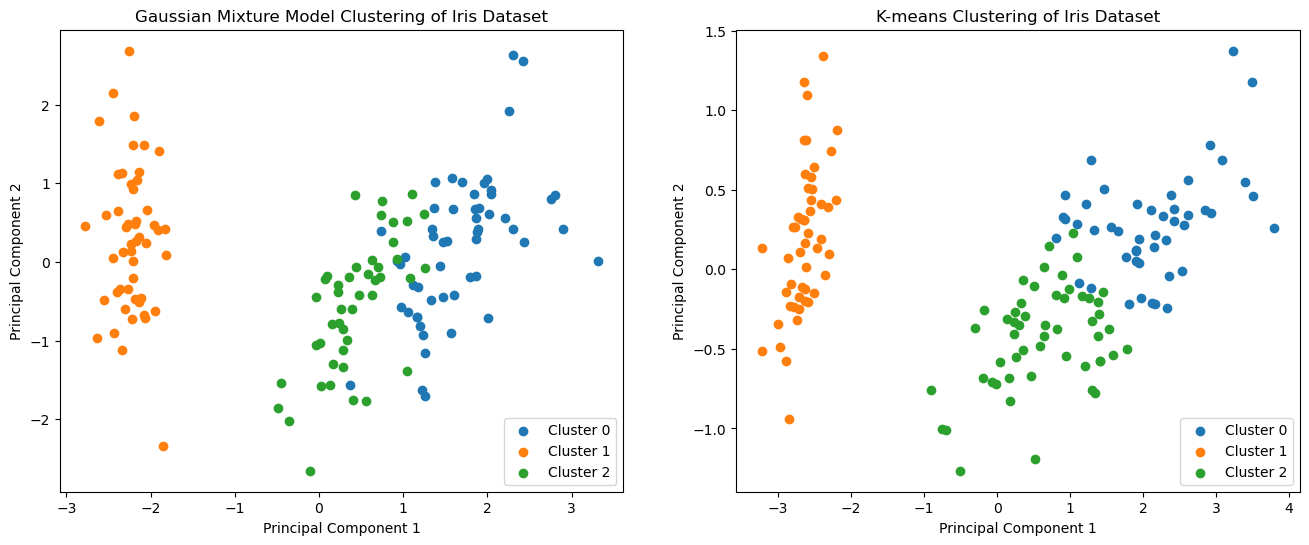

In [36]:
# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
iris_pca_gmm = pca.fit_transform(X_scaled)
iris_pca_kmeans = pca.fit_transform(X)

# Create DataFrames with the PCA results
iris_pca_gmm_df = pd.DataFrame(data=iris_pca_gmm, columns=['PC1', 'PC2'])
iris_pca_gmm_df['cluster'] = df['cluster']

iris_pca_kmeans_df = pd.DataFrame(data=iris_pca_kmeans, columns=['PC1', 'PC2'])
iris_pca_kmeans_df['cluster'] = iris_df['cluster']

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot the GMM clusters
for cluster in range(3):
    cluster_data = iris_pca_gmm_df[iris_pca_gmm_df['cluster'] == cluster]
    ax1.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.set_title('Gaussian Mixture Model Clustering of Iris Dataset')
ax1.legend()

# Plot the K-means clusters
for cluster in range(3):
    cluster_data = iris_pca_kmeans_df[iris_pca_kmeans_df['cluster'] == cluster]
    ax2.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
ax2.set_title('K-means Clustering of Iris Dataset')
ax2.legend()

plt.show()